In [377]:
#importing libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [ ]:
#importing dataset

In [20]:
df=pd.read_excel(r'C:\Users\sgi\Desktop\datatrained academy\Evaluation projects\project-14-Predicting Restaurant Food Cost\Participants_Data_Final\Data_Train.xlsx')
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [21]:
#applying eda

In [97]:
df1=pd.read_excel(r'C:\Users\sgi\Desktop\datatrained academy\Evaluation projects\project-14-Predicting Restaurant Food Cost\Participants_Data_Final\Data_Test.xlsx')
df1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [23]:
df3 = pd.concat([df,df1])

In [24]:
print(df.shape,df1.shape)

(12690, 9) (4231, 8)


In [25]:
df3.shape

(16921, 9)

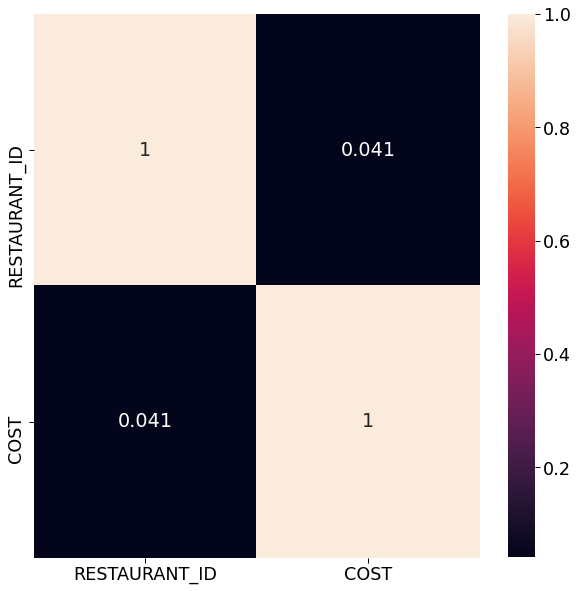

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
sns.set_context('paper', font_scale=2.0)

In [35]:
df3.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
dtype: object

In [34]:
df3.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [36]:
df3.isnull().values.any()

True

In [43]:
df3.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64

In [47]:
df3.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
dtype: object

In [63]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df4= df3.apply(lambda x: x.fillna(x.value_counts().index[0]))
df4

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.000000
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.000000
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.000000
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.000000
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.000000
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,655.252246
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,655.252246
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,655.252246
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,44 votes,655.252246


In [64]:
df4.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [65]:
df4.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,QUICK BITES,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Saligramam,3.8,221 votes,800.0
3,DESSERT PARLOR,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Bangalore,Bandra West,4.1,24 votes,300.0
4,CAFÉ,15387,Desserts,11am – 1am (Mon-Sun),Gurgaon,Lower Parel,4.0,165 votes,600.0
...,...,...,...,...,...,...,...,...,...
15569,NaN,331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15570,NaN,1670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15571,NaN,8617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15572,NaN,6485,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df['city']=le.fit_transform(df['city'])

list1=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST']
for val in list1:
   df4[val]=le.fit_transform(df4[val].astype(str))

In [69]:
df4.dtypes

TITLE            int32
RESTAURANT_ID    int32
CUISINES         int32
TIME             int32
CITY             int32
LOCALITY         int32
RATING           int32
VOTES            int32
COST             int32
dtype: object

In [ ]:
#df['Recovered'].unique()

In [ ]:
#df.isnull().sum()

In [ ]:
#checking correlation with the target variable
plt.figure(figsize=(20,10))
df.drop('Deaths',axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

In [ ]:
#checking correlation with the target variable
plt.figure(figsize=(20,10))
df.drop('Deaths',axis=1).corrwith(df['Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

In [ ]:
#checking correlation with the target variable
plt.figure(figsize=(20,10))
df.drop('Recovered',axis=1).corrwith(df['Recovered']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

In [ ]:
for col in df1.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [ ]:
df.columns

In [ ]:
#checking skewness

In [ ]:
df.skew()

In [ ]:
df.head()


In [ ]:
df.dtypes

In [ ]:
# UNIVARIATE AND BIVARIATE ANALYSIS

In [ ]:
sns.countplot(x='Province_State',data=df)

In [ ]:
sns.countplot(x='People_Tested',data=df)

In [ ]:
sns.countplot(x='Last_Update',data=df)

In [ ]:
sns.countplot(x='Deaths',data=df)

In [ ]:
sns.countplot(x='Recovered',data=df)

In [ ]:
sns.countplot(x='Hospitalization_Rate',data=df)

In [ ]:
sns.countplot(x='Testing_Rate',data=df)

In [ ]:
sns.countplot(x='Confirmed',data=df)

In [ ]:
sns.countplot(x='Active',data=df)

In [ ]:
df.hist(figsize=(15,15))

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Active',y='Recovered',data=df,kind='reg')

In [ ]:
df.columns

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Active',y='Deaths',data=df,kind='reg')

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Active',y='People_Tested',data=df,kind='reg')

In [ ]:
df['Recovered'].values.max()

In [ ]:
plt.figure(figsize=(20,4))
sns.barplot(x='People_Tested',y='Active', data=df)
sns.set_context('paper', font_scale=0.5)

In [ ]:
plt.figure(figsize=(20,3))
sns.barplot(x='People_Tested',y='Active', data=df)
sns.set_context('paper', font_scale=2)

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Deaths',y='Active', data=df)
sns.set_context('paper', font_scale=1.6)

In [ ]:
plt.figure(figsize=(29,3))
sns.countplot(x='Deaths',data=df)
sns.set_context('paper', font_scale=1.9)

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
df=df.corr()
df

In [ ]:
df.columns

In [ ]:
#splitting the trining set and test set

In [71]:
X = df4.iloc[:, :-1].values
y = df4.iloc[:, -1].values

In [72]:
X

array([[   34, 14951,  3294, ...,   328,    17,  1470],
       [   36,  3556,   364, ...,  1214,    23,  1105],
       [   34,  1020,  3729, ...,  1272,    19,   822],
       ...,
       [  104, 14039,  2089, ...,  1370,    18,  1526],
       [  104, 11670,  4580, ...,   642,     0,  1384],
       [  104,  7156,  3491, ...,  1148,    18,  1656]])

In [73]:
y

array([ 7, 18, 82, ..., 76, 76, 76])

In [74]:
# THINK WHICH MODEL CAN BE APPLIED OVER THE DATASET

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

In [76]:
y_test.shape

(8461,)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6 0 0 ... 0 0 0]
 [0 8 0 ... 0 4 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 2 0 ... 0 2 0]
 [0 1 0 ... 0 0 0]]


0.2100224559744711

In [93]:
print(y_test, y_pred)

[65 74 76 ... 36  7 62] [43 62 43 ... 65 76 76]


In [80]:
df.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,95,2757,2934,1144,131,342,19,1349,65
12686,33,11630,2143,1177,222,133,24,191,25
12687,71,990,2088,1137,239,1342,21,1428,11
12688,31,8652,3506,1837,67,631,16,996,57
12689,31,8901,2946,835,131,1333,15,1505,72


In [81]:
y_test

array([65, 74, 76, ..., 36,  7, 62])

In [82]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
pred=regressor.predict(X_test)

In [83]:
from sklearn import metrics

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 26.664224086987353
MSE: 915.2133317574754
RMSE: 30.252492984173642


In [85]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred=regressor.predict(X_test)

In [86]:
# FIND THE INPUT FEATURES AND TARGET VARIABLES

In [87]:
from sklearn import metrics

In [88]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 20.351826321575956
MSE: 566.7781465675118
RMSE: 23.807102859598682


In [94]:
print(y_test, y_pred)

[65 74 76 ... 36  7 62] [43 62 43 ... 65 76 76]


In [89]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 18.20652348028208
MSE: 515.02628245649
RMSE: 22.694190500136592


In [95]:
print(y_test, y_pred)

[65 74 76 ... 36  7 62] [43 62 43 ... 65 76 76]


Text(0, 0.5, 'Predicted Y')

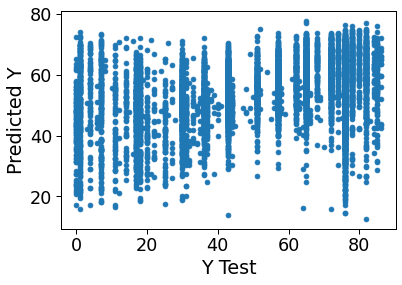

In [91]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [92]:
#saving this model 
import joblib

#saving the model as a pickle in a file
joblib.dump(rdr,'space.plk')

['space.plk']